In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Assuming the file name is 'wifi_localization.csv'
import io
data = pd.read_csv(io.BytesIO(uploaded['wifi_localization.csv']), header=None)
data[['Wifi 1','Wifi 2', 'Wifi 3', 'Wifi 4','Wifi 5','Wifi 6','Wifi 7','Room']] = data[0].str.split('\t', expand=True)
data = data.drop([0], axis=1)

# Data Preprocessing
encoder = LabelEncoder()
data['encoded_data'] = encoder.fit_transform(data['Room'])

# Train-Test Split
features = data.drop(['Room','encoded_data'], axis=1)
target = data['encoded_data']
featurestrain, featurestest, targettrain, targettest = train_test_split(features, target, random_state=1)

Saving wifi_localization.csv to wifi_localization.csv


In [ ]:
data.head()
data.isnull().sum()

Wifi 1          0
Wifi 2          0
Wifi 3          0
Wifi 4          0
Wifi 5          0
Wifi 6          0
Wifi 7          0
Room            0
encoded_data    0
dtype: int64

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(featurestrain, targettrain)
naive_bayes_predicted = naive_bayes_model.predict(featurestest)
print("Naive Bayes Accuracy:", accuracy_score(targettest, naive_bayes_predicted))


Naive Bayes Accuracy: 0.982


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(featurestrain, targettrain)
knn_predicted = knn_model.predict(featurestest)
print("KNN Accuracy:", accuracy_score(targettest, knn_predicted))

KNN Accuracy: 0.988


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(featurestrain, targettrain)

# Make predictions
dt_predicted = dt_model.predict(featurestest)

# Print accuracy
print("Decision Tree Accuracy:", accuracy_score(targettest, dt_predicted))

Decision Tree Accuracy: 0.962


In [ ]:
from sklearn.svm import SVC

svc_linear_model = SVC(kernel='linear', C=10000)
svc_linear_model.fit(featurestrain, targettrain)
svc_linear_predicted = svc_linear_model.predict(featurestest)
print("SVM Linear Accuracy:", accuracy_score(targettest, svc_linear_predicted))


SVM Linear Accuracy: 0.978


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid_search = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
grid_search.fit(featurestrain, targettrain)
best_model = grid_search.best_estimator_
svc_r_predicted = best_model.predict(featurestest)
print("SVM RBF Accuracy:", accuracy_score(targettest, svc_r_predicted))


SVM RBF Accuracy: 0.982


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(featurestrain, targettrain)
forest_predicted = forest_model.predict(featurestest)
print("Random Forest Accuracy:", accuracy_score(targettest, forest_predicted))


Random Forest Accuracy: 0.982


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, jaccard_score, log_loss

# Assuming 'data' is already loaded and processed as per your previous steps
# Ensure 'data' contains the necessary columns ('Wifi 1' to 'Wifi 7' and 'Room')

# Data Preprocessing
encoder = LabelEncoder()
data['encoded_data'] = encoder.fit_transform(data['Room'])

# Train-Test Split
features = data[['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7']]
target = data['encoded_data']
featurestrain, featurestest, targettrain, targettest = train_test_split(features, target, random_state=1)

# Initialize classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM - Linear Kernel': SVC(kernel='linear', probability=True),
    'SVM - RBF Kernel': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Initialize lists to store metrics
training_metrics = []
testing_metrics = []

# Function to compute metrics
def compute_metrics(clf, name, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    jaccard_train = jaccard_score(y_train, y_train_pred, average='weighted')
    jaccard_test = jaccard_score(y_test, y_test_pred, average='weighted')

    logloss_train = log_loss(y_train, clf.predict_proba(X_train))
    logloss_test = log_loss(y_test, clf.predict_proba(X_test))

    return {
        'Algorithm': name,
        'Accuracy': f'{accuracy_train:.2f} / {accuracy_test:.2f}',
        'Jaccard Index': f'{jaccard_train:.2f} / {jaccard_test:.2f}',
        'Log Loss': f'{logloss_train:.2f} / {logloss_test:.2f}'
    }

# Compute metrics for each classifier
for name, clf in classifiers.items():
    metrics_train = compute_metrics(clf, name, featurestrain, targettrain, featurestest, targettest)
    metrics_test = compute_metrics(clf, name, featurestest, targettest, featurestrain, targettrain)

    # Append results to lists
    training_metrics.append(metrics_train)
    testing_metrics.append(metrics_test)

# Convert lists to DataFrames
training_metrics_df = pd.DataFrame(training_metrics)
testing_metrics_df = pd.DataFrame(testing_metrics)

# Display training and testing metrics tables
print("Training Metrics:")
print(training_metrics_df.to_string(index=False))

print("\nTesting Metrics:")
print(testing_metrics_df.to_string(index=False))


Training Metrics:
          Algorithm    Accuracy Jaccard Index    Log Loss
        Naive Bayes 0.98 / 0.98   0.97 / 0.96 0.06 / 0.07
K-Nearest Neighbors 0.99 / 0.99   0.98 / 0.98 0.03 / 0.17
      Decision Tree 1.00 / 0.97   1.00 / 0.93 0.00 / 1.23
SVM - Linear Kernel 0.99 / 0.98   0.98 / 0.96 0.05 / 0.07
   SVM - RBF Kernel 0.98 / 0.98   0.97 / 0.96 0.05 / 0.05
      Random Forest 1.00 / 0.99   1.00 / 0.97 0.02 / 0.06

Testing Metrics:
          Algorithm    Accuracy Jaccard Index    Log Loss
        Naive Bayes 0.98 / 0.98   0.96 / 0.96 0.05 / 0.07
K-Nearest Neighbors 0.98 / 0.98   0.97 / 0.96 0.03 / 0.31
      Decision Tree 1.00 / 0.96   1.00 / 0.92 0.00 / 1.44
SVM - Linear Kernel 1.00 / 0.97   1.00 / 0.94 0.05 / 0.09
   SVM - RBF Kernel 0.98 / 0.98   0.95 / 0.96 0.05 / 0.07
      Random Forest 1.00 / 0.98   1.00 / 0.96 0.03 / 0.09


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, labels):
    conf_mat = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def print_classification_report(y_true, y_pred, labels):
    report = classification_report(y_true, y_pred, target_names=labels)
    print(report)

plot_confusion_matrix(targettest, svc_r_predicted, encoder.classes_)
print_classification_report(targettest, svc_r_predicted, encoder.classes_)


NameError: name 'svc_r_predicted' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Reshape y to be a 1D array for regression
y = data['Wifi 1'].values

# Splitting data into train and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, y, random_state=1)

# Define the hyperparameters grid
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation for RandomForestRegressor
grid_search_reg = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid_reg,
                           cv=5,
                           scoring='r2')
grid_search_reg.fit(X_train_reg, y_train_reg)

# Get the best estimator and its parameters for RandomForestRegressor
best_regressor = grid_search_reg.best_estimator_
best_params = grid_search_reg.best_params_

# Evaluate the best model for RandomForestRegressor
best_score = grid_search_reg.best_score_
test_score = best_regressor.score(X_test_reg, y_test_reg)

print("Best Parameters for RandomForestRegressor:", best_params)
print("Best Cross-Validation Score for RandomForestRegressor:", best_score)
print("Test Score for RandomForestRegressor:", test_score)


Best Parameters for RandomForestRegressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score for RandomForestRegressor: 0.9998024372290848
Test Score for RandomForestRegressor: 0.9999423594912525


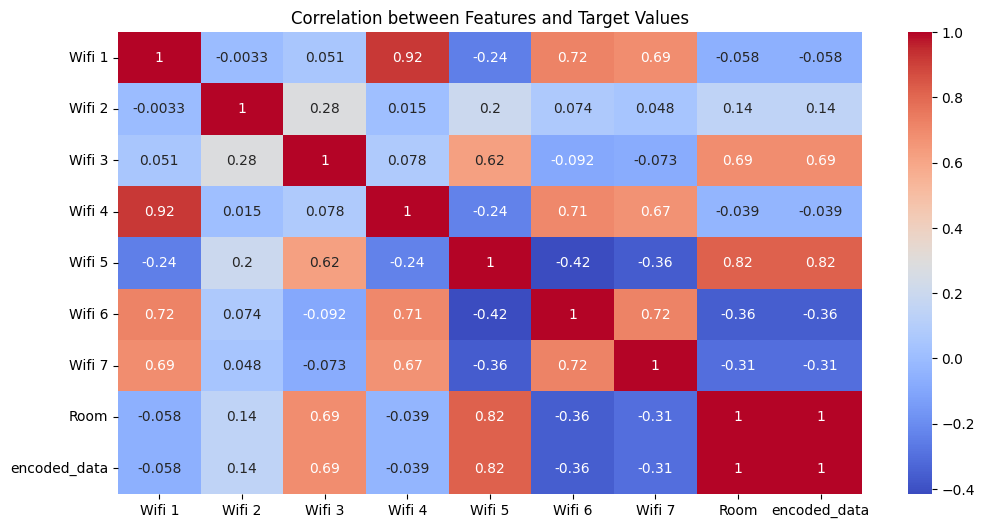

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features and Target Values')
plt.show()


In [ ]:
# Predict WiFi signal strengths for the test set
predicted_signal_strengths = best_regressor.predict(X_test_reg)

# Calculate mean squared error
mse = mean_squared_error(y_test_reg, predicted_signal_strengths)
print("Mean Squared Error:", mse)

# Display the predicted values
print("Predicted WiFi Signal Strengths:", predicted_signal_strengths)

Mean Squared Error: 0.008358900000000022
Predicted WiFi Signal Strengths: [-39.    -62.    -53.    -47.    -49.    -66.    -38.    -67.    -52.
 -46.    -55.    -51.    -65.    -50.    -64.    -58.    -48.    -46.
 -13.35  -49.    -63.    -61.    -61.    -38.    -42.    -68.005 -59.
 -62.    -42.    -59.    -55.    -13.315 -67.    -41.    -39.    -40.
 -39.    -63.    -17.04  -59.    -61.    -63.    -52.    -49.    -50.
 -64.    -42.    -60.    -60.    -59.    -60.    -47.    -40.    -58.
 -37.    -35.    -40.    -41.    -58.    -54.    -61.    -63.    -51.
 -50.    -45.    -11.82  -45.    -16.975 -41.    -48.    -61.    -61.
 -58.    -60.    -47.    -45.    -48.    -53.    -47.    -17.035 -64.
 -49.    -57.    -58.    -51.    -51.    -18.945 -65.    -65.    -58.
 -63.    -45.    -65.    -61.    -57.    -39.    -47.    -46.    -38.
 -71.39  -64.    -65.    -42.    -65.    -37.    -59.    -58.    -52.
 -38.    -50.    -41.    -62.    -50.    -56.    -62.    -36.    -37.
 -45.    -61.   

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate the accuracy score
accuracy = r2_score(y_test_reg, predicted_signal_strengths)
print("Accuracy Score (R^2):", accuracy)

Accuracy Score (R^2): 0.9999423594912525


<Figure size 1000x600 with 0 Axes>

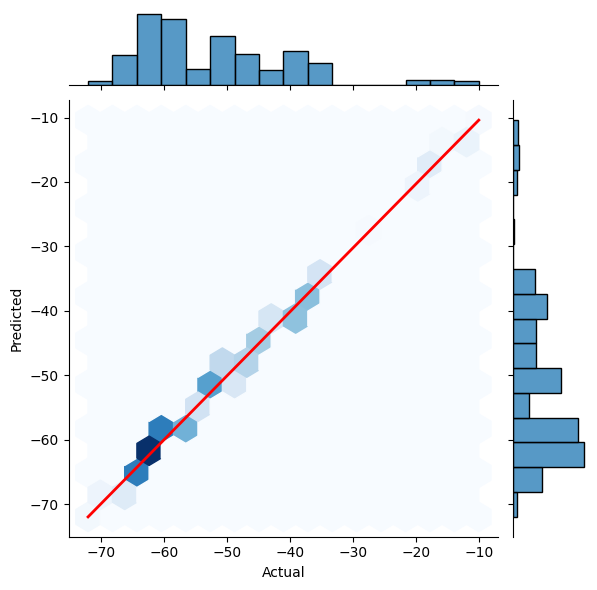

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test_reg,
    'Predicted': predicted_signal_strengths
})

# Convert 'Actual' and 'Predicted' columns to numeric type (if not already)
results_df['Actual'] = pd.to_numeric(results_df['Actual'])
results_df['Predicted'] = pd.to_numeric(results_df['Predicted'])

# Plot a heatmap of the predicted vs. actual values
plt.figure(figsize=(10, 6))
heatmap = sns.jointplot(x='Actual', y='Predicted', data=results_df, kind='hex', cmap='Blues')
heatmap.ax_joint.plot([min(results_df['Actual']), max(results_df['Actual'])], [min(results_df['Predicted']), max(results_df['Predicted'])], color='red', lw=2)
plt.show()